In [81]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [13]:
iris = datasets.load_iris()

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [39]:
X = iris.data[:,0:2]
y = iris.target

In [40]:
model = KMeans(n_clusters=3).fit(X)

In [58]:
labels = model.labels_

In [59]:
centroids = model.cluster_centers_

In [60]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [61]:
features = iris.feature_names

In [62]:
centroids[:,0]

array([6.81276596, 5.006     , 5.77358491])

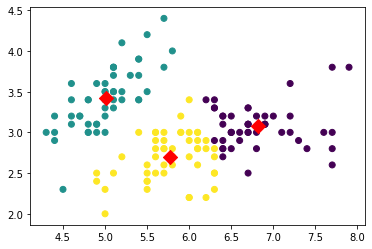

In [63]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centroids[:,0],centroids[:,1],marker = 'D',s=100,c='r')

In [71]:
df = pd.DataFrame({'labels':labels,'features':iris.target})

### Crosstab

In [78]:
pd.crosstab(df['labels'],df['features'])

features,0,1,2
labels,,,
0,0,12,35
1,50,0,0
2,0,38,15


# Standard Scaler

In [72]:
wine = datasets.load_wine()

In [118]:
X = wine.data
y = wine.target

In [119]:
X.mean()

69.13366292091617

In [120]:
before_scaling = KMeans(n_clusters=3)

In [121]:
before_scaling.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [122]:
before_scaling.inertia_

2370689.686782968

In [123]:
labels = before_scaling.labels_

In [124]:
features = wine.target

In [125]:
features

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [137]:
df = pd.DataFrame({'labels':labels,'features':features})

# Before Scaling

In [136]:
pd.crosstab(df.labels,df.features)

features,0,1,2
labels,,,
0,13,20,29
1,46,1,0
2,0,50,19


In [128]:
X = StandardScaler().fit_transform(X)

In [129]:
after_scaling = KMeans(n_clusters=3).fit(X)

In [130]:
after_scaling.inertia_

1277.928488844642

In [131]:
labels2 = after_scaling.labels_

In [132]:
features = wine.target

In [138]:
df2 = pd.DataFrame({'labels':labels2,'features':features})

# After Scaling

In [135]:
pd.crosstab(df2.labels,df2.features)

features,0,1,2
labels,,,
0,0,65,0
1,59,3,0
2,0,3,48
